In [1]:
# Load the necessary packages and modules
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
# Compute the Bollinger Bands 
def calculate_BBANDS(data, window):
    MA = data['Close'].rolling(window=window).mean()
    SD = data['Close'].rolling(window=window).std()
    data['MiddleBand'] = MA
    data['UpperBand'] = MA + (2 * SD)
    data['LowerBand'] = MA - (2 * SD)
    return data

In [6]:
# Retrieve the Google stock data from Yahoo finance
data = yf.download('NVDA', start="2020-01-01", end="2024-12-31")
data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-05,127.379997,128.850006,125.680000,125.830002,125.830002,214176700
2024-07-08,127.489998,130.770004,127.040001,128.199997,128.199997,237677300
2024-07-09,130.350006,133.820007,128.649994,131.380005,131.380005,285366600
2024-07-10,134.029999,135.100006,132.419998,134.910004,134.910004,248978600
2024-07-11,135.750000,136.149994,127.050003,127.400002,127.400002,372939600


In [8]:
# Compute the Bollinger Bands for Google using the 50-day Moving average
n = 50
data_with_bbands = calculate_BBANDS(data, n)

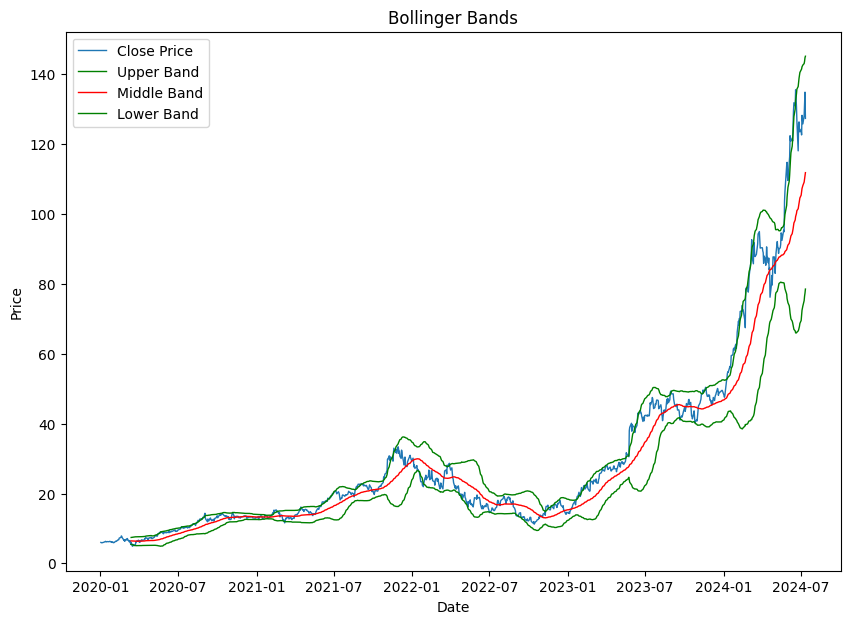

In [9]:
# Create the plot
plt.figure(figsize=(10,7))

# Set the title and axis labels
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')

# Plot the closing price and Bollinger Bands
plt.plot(data_with_bbands['Close'], lw=1, label='Close Price')
plt.plot(data_with_bbands['UpperBand'], 'g', lw=1, label='Upper Band')
plt.plot(data_with_bbands['MiddleBand'], 'r', lw=1, label='Middle Band')
plt.plot(data_with_bbands['LowerBand'], 'g', lw=1, label='Lower Band')

# Add a legend to the axis
plt.legend()

plt.show()